# Importing the dataset
## Here i used in-built "tips"dataset 

In [1]:
import seaborn as sns

C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
dataset = sns.load_dataset("tips")
print(dataset)

     total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
1         10.34  1.66    Male     No   Sun  Dinner     3
2         21.01  3.50    Male     No   Sun  Dinner     3
3         23.68  3.31    Male     No   Sun  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
..          ...   ...     ...    ...   ...     ...   ...
239       29.03  5.92    Male     No   Sat  Dinner     3
240       27.18  2.00  Female    Yes   Sat  Dinner     2
241       22.67  2.00    Male    Yes   Sat  Dinner     2
242       17.82  1.75    Male     No   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2

[244 rows x 7 columns]


# Data visualization 

## Histogram

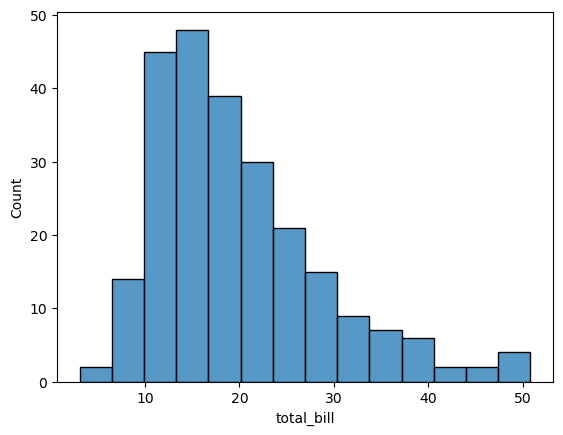

In [4]:
sns.histplot(dataset["total_bill"]).figure.savefig("output/output2.png")
#check the distribution

## Scatterplot

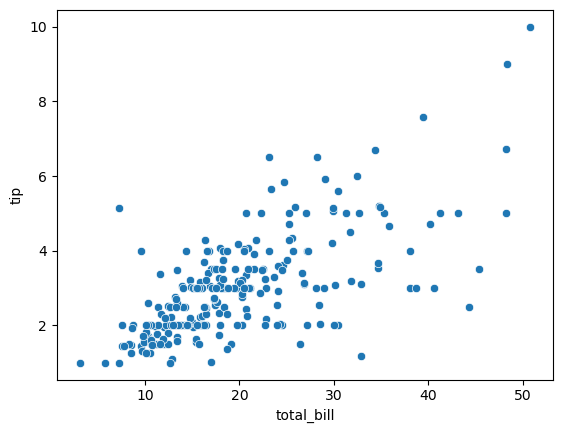

In [5]:
sns.scatterplot(x="total_bill",y="tip",data=dataset).figure.savefig("output/output_sp.png")
#scatterplot to depict the relationship between total bills and corresponding tip amounts

## Box plot

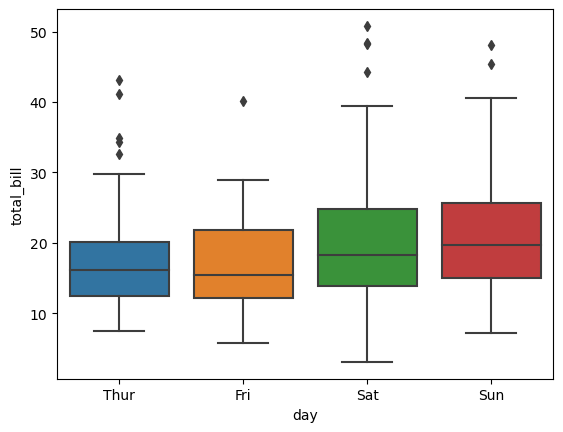

In [6]:
sns.boxplot(x="day",y="total_bill",data=dataset).figure.savefig("output/output_boxp.png")
# box plot to visualize and compare the distribution of total bills for each day

## Count plot

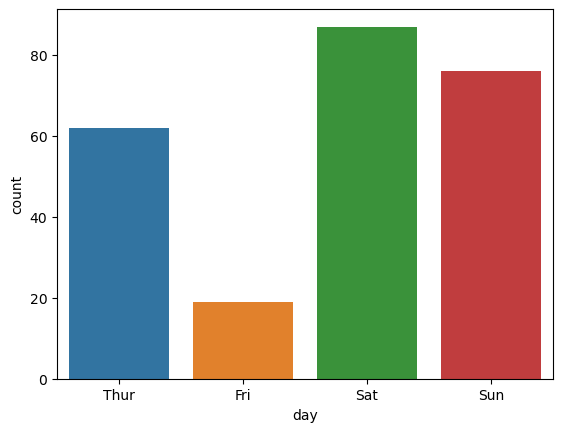

In [7]:
sns.countplot(x="day",data=dataset).figure.savefig("output/output_coutp.png")
#count plot here to visualize and compare the frequency of each unique day

## Heatmap


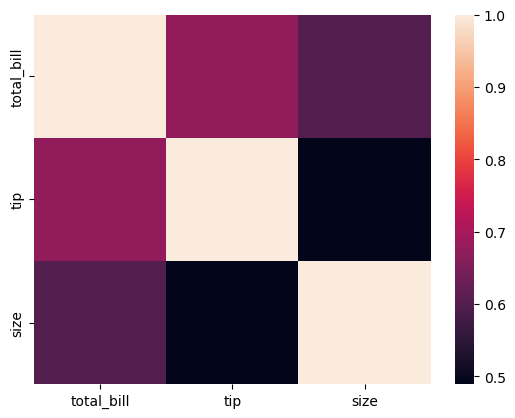

In [8]:
sns.heatmap(dataset.corr()).figure.savefig("output/heatmap.png")
#heatmap is used here to display a visual representation of the correlation matrix between numerical variables

# Data processing

In [9]:
#check for missing values
print(dataset.isnull().sum())

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64


In [10]:
# this dataset doesn't have null values

## Encording categorical variables

In [17]:
#encording categorical variables using one-hot encording
import pandas as pd


In [18]:
data_encoded = pd.get_dummies(dataset, columns=["sex","smoker","day","time"])
print(data_encoded)


     total_bill   tip  size  sex_Male  sex_Female  smoker_Yes  smoker_No  \
0         16.99  1.01     2         0           1           0          1   
1         10.34  1.66     3         1           0           0          1   
2         21.01  3.50     3         1           0           0          1   
3         23.68  3.31     2         1           0           0          1   
4         24.59  3.61     4         0           1           0          1   
..          ...   ...   ...       ...         ...         ...        ...   
239       29.03  5.92     3         1           0           0          1   
240       27.18  2.00     2         0           1           1          0   
241       22.67  2.00     2         1           0           1          0   
242       17.82  1.75     2         1           0           0          1   
243       18.78  3.00     2         0           1           0          1   

     day_Thur  day_Fri  day_Sat  day_Sun  time_Lunch  time_Dinner  
0           0      

## Scaling numerical features

In [19]:
from sklearn.preprocessing import StandardScaler

In [21]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data_encoded["total_bill"] = scaler.fit_transform(data_encoded[["total_bill"]])
print(data_encoded["total_bill"][0])

-0.3147113050904943


In [22]:
#This is done to ensure that numeric values of different ranges have, more or less, equal influence on the results.

## Hadaling outliers 

In [23]:
# Detect and handle outliers using IQR
Q1 = data_encoded["total_bill"].quantile(0.25)
Q3 = data_encoded["total_bill"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

data_encoded = data_encoded[(data_encoded["total_bill"] >= lower_bound) & (data_encoded["total_bill"] <= upper_bound)]
print(data_encoded.head())
data_encoded.sha

   total_bill   tip  size  sex_Male  sex_Female  smoker_Yes  smoker_No  \
0   -0.314711  1.01     2         0           1           0          1   
1   -1.063235  1.66     3         1           0           0          1   
2    0.137780  3.50     3         1           0           0          1   
3    0.438315  3.31     2         1           0           0          1   
4    0.540745  3.61     4         0           1           0          1   

   day_Thur  day_Fri  day_Sat  day_Sun  time_Lunch  time_Dinner  
0         0        0        0        1           0            1  
1         0        0        0        1           0            1  
2         0        0        0        1           0            1  
3         0        0        0        1           0            1  
4         0        0        0        1           0            1  


## Data splitting 

In [24]:
from sklearn.model_selection import train_test_split 
X = data_encoded.drop('tip',axis=1)
Y =data_encoded['tip']
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=0)
print("Length of complete dataset: ", len(X))
print("Length of training dataset: ", len(x_train))
print("Length of testing dataset: ", len(x_test))

Length of complete dataset:  235
Length of training dataset:  188
Length of testing dataset:  47


# ML models

Linear regression falls under the category of supervised ML algorithms and is utilized to forecast values within a continuous numerical range.

In [27]:
from sklearn.linear_model import LinearRegression 
lr_model= LinearRegression()
lr_model.fit(x_train,y_train)
print(lr_model.predict(x_test.head()))

[2.55571296 2.90474195 3.00435085 2.32294102 2.31326488]


# Random forest regressor

The random forest regressor. The random forest is a combination of decision trees working together to make predictions. Averaging their answers or picking the most popular answer usually makes better predictions than a single decision tree can provide.

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(x_train, y_train)
print(rf_model.predict(x_test.head(1)))

random_state=42 is used to control the randomness involved in building the decision trees.
n_estimators=100 represents the number of decision trees that will be created and combined to make predictions on the input data.

# DL model

In [51]:
import tensorflow as tf
from tensorflow import keras

nn_model = keras.Sequential([
    keras.layers.Input(shape=x_train.shape[1]),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1)
])

nn_model.compile(optimizer='adam', loss='mean_squared_error')


In [52]:
history=nn_model.fit(x_train, y_train, epochs=50, batch_size=16, validation_split=0.2)

Epoch 1/50
10/10 [==============================] - 2s 45ms/step - loss: 9.4808 - val_loss: 8.9032
Epoch 2/50
10/10 [==============================] - 0s 11ms/step - loss: 5.6706 - val_loss: 5.4128
Epoch 3/50
10/10 [==============================] - 0s 11ms/step - loss: 3.0470 - val_loss: 3.0416
Epoch 4/50
10/10 [==============================] - 0s 11ms/step - loss: 1.5939 - val_loss: 1.7510
Epoch 5/50
10/10 [==============================] - 0s 11ms/step - loss: 1.1550 - val_loss: 1.3734
Epoch 6/50
10/10 [==============================] - 0s 11ms/step - loss: 1.1199 - val_loss: 1.3146
Epoch 7/50
10/10 [==============================] - 0s 11ms/step - loss: 1.0528 - val_loss: 1.3474
Epoch 8/50
10/10 [==============================] - 0s 12ms/step - loss: 1.0188 - val_loss: 1.3666
Epoch 9/50
10/10 [==============================] - 0s 12ms/step - loss: 0.9956 - val_loss: 1.2821
Epoch 10/50
10/10 [==============================] - 0s 11ms/step - loss: 0.9682 - val_loss: 1.2215
Epoch 11/

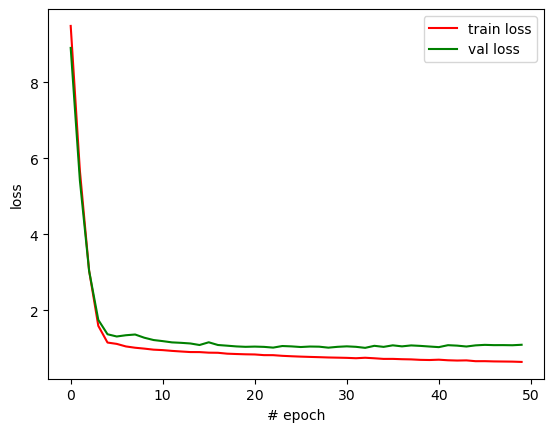

<Figure size 640x480 with 0 Axes>

In [53]:
from matplotlib import pyplot as plt
plt.plot(history.history['loss'],'r',label='train loss')
plt.plot(history.history['val_loss'],'g',label='val loss')
plt.xlabel('# epoch')
plt.ylabel('loss')
plt.legend()
plt.show()
plt.savefig("output/plot_train_val_loss.png")

In [54]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Linear Regression
lr_predictions = lr_model.predict(x_test)
lr_mae = mean_absolute_error(y_test, lr_predictions)
lr_mse = mean_squared_error(y_test, lr_predictions)
print("Linear regression - Mean absolute error: ",lr_mae)
print("Linear regression - Mean squared error",lr_mse)

# Random Forest Regressor
rf_predictions = rf_model.predict(x_test)
rf_mae = mean_absolute_error(y_test, rf_predictions)
rf_mse = mean_squared_error(y_test, rf_predictions)
print("Random forest - Mean absolute error: ",rf_mae)
print("Random forest - Mean squared error",rf_mse)

# Neural Network
nn_predictions = nn_model.predict(x_test)
nn_mae = mean_absolute_error(y_test, nn_predictions)
nn_mse = mean_squared_error(y_test, nn_predictions)
print("Neural network - Mean absolute error: ",nn_mae)
print("Neural network - Mean squared error",nn_mse)

Linear regression - Mean absolute error:  0.7066374676342596
Linear regression - Mean squared error 0.7788634518368952
Random forest - Mean absolute error:  0.6949319148936175
Random forest - Mean squared error 0.7563464770212772
2/2 [==============================] - 0s 5ms/step
Neural network - Mean absolute error:  0.7379084137652782
Neural network - Mean squared error 0.8513198332189685


# Results analysis

Based on the time variable

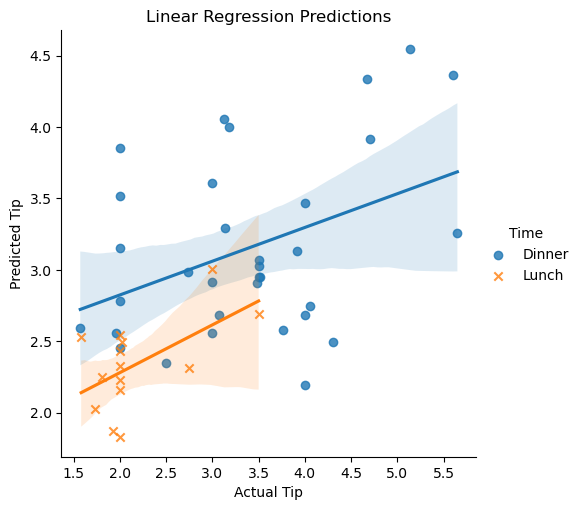

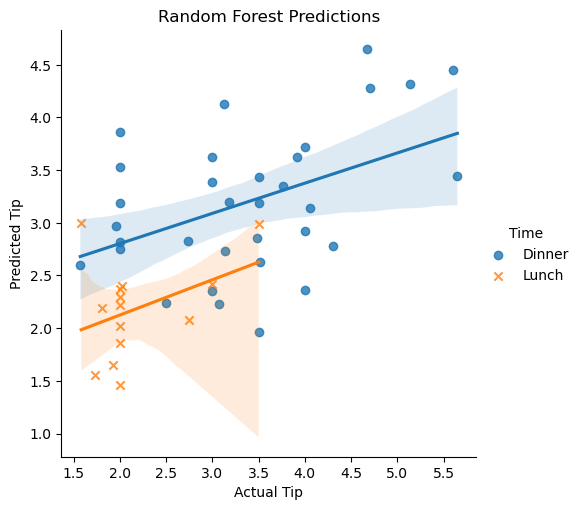

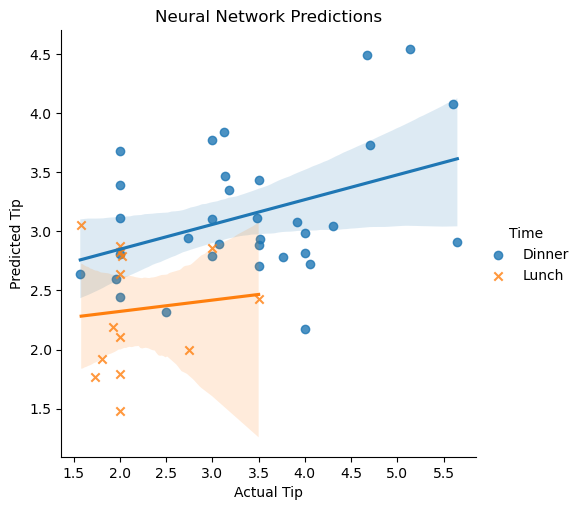

In [55]:
#Import the necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Flatten the neural network predictions to make them compatible with the plotting function
nn_predictions = nn_predictions.flatten()

time_mapping = {1: 'Lunch', 0: 'Dinner'}

# Combine the actual and predicted tip values with the 'time' feature for each model
lr_df = pd.DataFrame({'Actual Tip': y_test, 'Predicted Tip (LR)': lr_predictions, 'Time': x_test['time_Lunch'].map(time_mapping)})
rf_df = pd.DataFrame({'Actual Tip': y_test, 'Predicted Tip (RF)': rf_predictions, 'Time': x_test['time_Lunch'].map(time_mapping)})
nn_df = pd.DataFrame({'Actual Tip': y_test, 'Predicted Tip (NN)': nn_predictions, 'Time': x_test['time_Lunch'].map(time_mapping)})

# Create separate scatterplots for each model
sns.lmplot(x='Actual Tip', y='Predicted Tip (LR)', data=lr_df, hue='Time', markers=['o', 'x'])
plt.title('Linear Regression Predictions')
plt.xlabel('Actual Tip')
plt.ylabel('Predicted Tip')
plt.savefig("output/plot2.png")

sns.lmplot(x='Actual Tip', y='Predicted Tip (RF)', data=rf_df, hue='Time', markers=['o', 'x'])
plt.title('Random Forest Predictions')
plt.xlabel('Actual Tip')
plt.ylabel('Predicted Tip')
plt.savefig("output/plot1.png")

sns.lmplot(x='Actual Tip', y='Predicted Tip (NN)', data=nn_df, hue='Time', markers=['o', 'x'])
plt.title('Neural Network Predictions')
plt.xlabel('Actual Tip')
plt.ylabel('Predicted Tip')
plt.savefig("output/plot.png")

Based on the sex variable

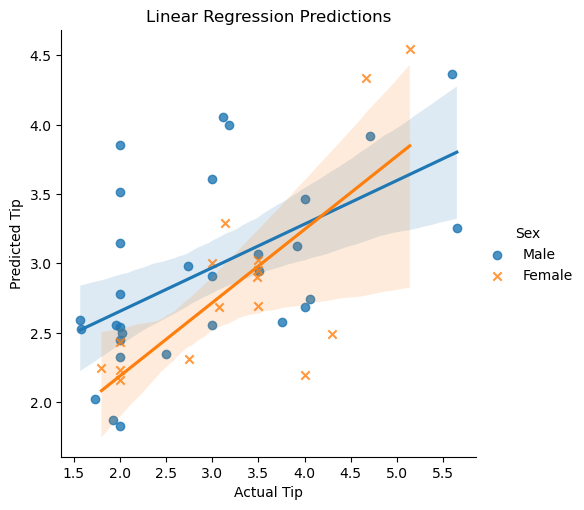

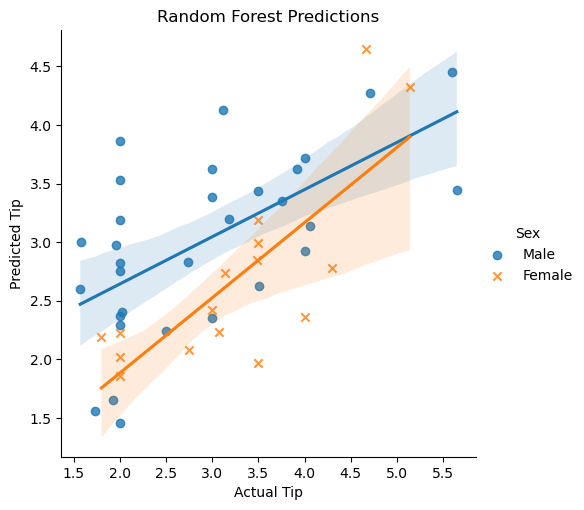

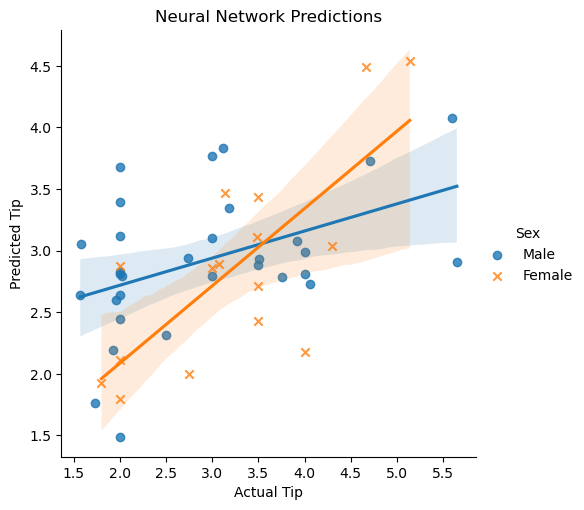

In [58]:
# Importing necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Flatten the neural network predictions to make them compatible with the plotting function
nn_predictions = nn_predictions.flatten()

time_mapping = {1: 'Female', 0: 'Male'}

# Combine the actual and predicted tip values with the 'sex' feature for each model
lr_df = pd.DataFrame({'Actual Tip': y_test, 'Predicted Tip (LR)': lr_predictions, 'Sex': x_test['sex_Female'].map(time_mapping)})
rf_df = pd.DataFrame({'Actual Tip': y_test, 'Predicted Tip (RF)': rf_predictions, 'Sex': x_test['sex_Female'].map(time_mapping)})
nn_df = pd.DataFrame({'Actual Tip': y_test, 'Predicted Tip (NN)': nn_predictions, 'Sex': x_test['sex_Female'].map(time_mapping)})

# Create separate scatterplots for each model
sns.lmplot(x='Actual Tip', y='Predicted Tip (LR)', data=lr_df, hue='Sex', markers=['o', 'x'])
plt.title('Linear Regression Predictions')
plt.xlabel('Actual Tip')
plt.ylabel('Predicted Tip')
plt.savefig("output/plot2.png")

sns.lmplot(x='Actual Tip', y='Predicted Tip (RF)', data=rf_df, hue='Sex', markers=['o', 'x'])
plt.title('Random Forest Predictions')
plt.xlabel('Actual Tip')
plt.ylabel('Predicted Tip')
plt.savefig("output/plot1.png")

sns.lmplot(x='Actual Tip', y='Predicted Tip (NN)', data=nn_df, hue='Sex', markers=['o', 'x'])
plt.title('Neural Network Predictions')
plt.xlabel('Actual Tip')
plt.ylabel('Predicted Tip')
plt.savefig("output/plot.png")

## Histograms


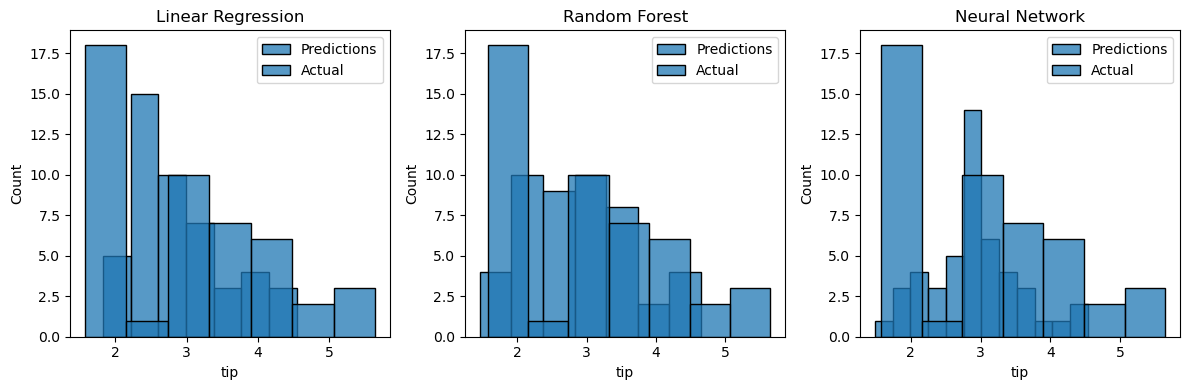

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns

# Flatten the neural network predictions to make them compatible with the plotting function
nn_predictions = nn_predictions.flatten()

plt.figure(figsize=(12, 4))

# First subplot for Linear Regression
plt.subplot(131)
sns.histplot(lr_predictions, label="Predictions") # Plot the predictions
sns.histplot(y_test, label="Actual") # Plot the actual values
plt.title("Linear Regression")
plt.legend()

# Second subplot for Random Forest
plt.subplot(132)
sns.histplot(rf_predictions, label="Predictions") # Plot the predictions
sns.histplot(y_test, label="Actual") # Plot the actual values
plt.title("Random Forest")
plt.legend()

# Third subplot for Neural Network
plt.subplot(133)
sns.histplot(nn_predictions, label="Predictions") # Plot the predictions
sns.histplot(y_test, label="Actual") # Plot the actual values
plt.title("Neural Network")
plt.legend()

# Adjust the layout of the subplots to avoid overlapping
plt.tight_layout()
plt.savefig('output/foo.png')

# Presenting results

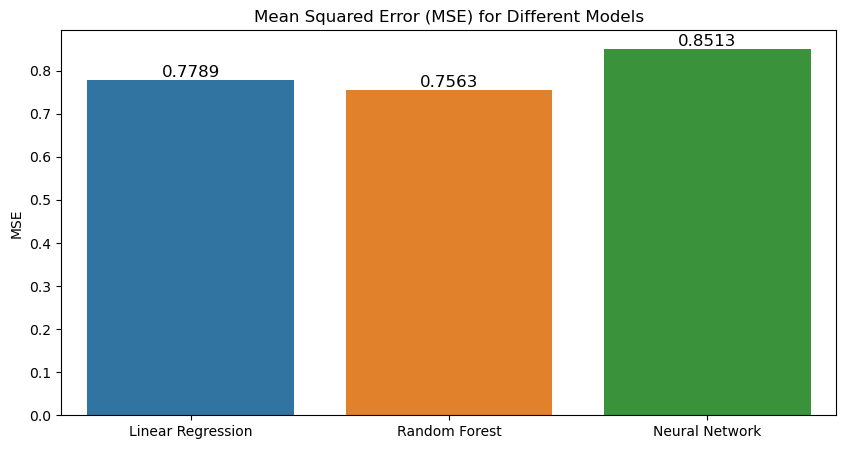

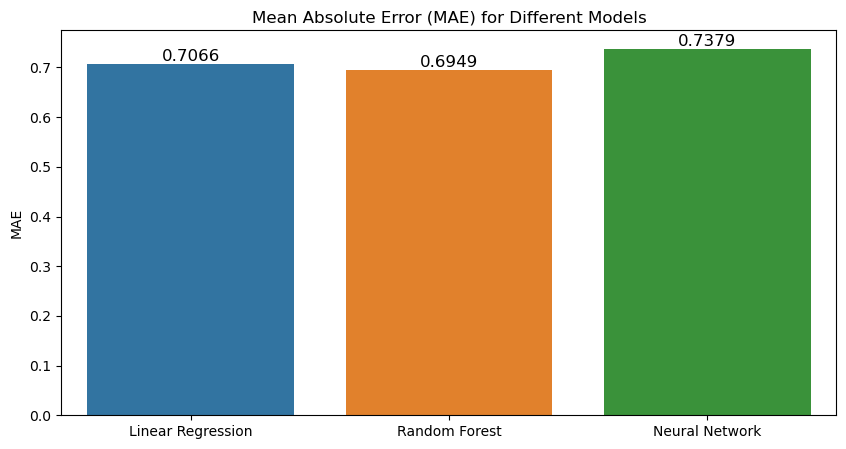

In [60]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Calculate MSE and MAE for each model
lr_mse = mean_squared_error(y_test, lr_predictions)
rf_mse = mean_squared_error(y_test, rf_predictions)
nn_mse = mean_squared_error(y_test, nn_predictions)

lr_mae = mean_absolute_error(y_test, lr_predictions)
rf_mae = mean_absolute_error(y_test, rf_predictions)
nn_mae = mean_absolute_error(y_test, nn_predictions)

nn_predictions = nn_predictions.flatten()

# Define custom colors
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']

# Create a bar chart for MSE with custom colors
models = ['Linear Regression', 'Random Forest', 'Neural Network']
mse_scores = [lr_mse, rf_mse, nn_mse]

plt.figure(figsize=(10, 5))
bar = sns.barplot(x=models, y=mse_scores, palette=colors)
plt.title('Mean Squared Error (MSE) for Different Models')
plt.ylabel('MSE')

# Add data labels on top of each bar
for i, v in enumerate(mse_scores):
    bar.text(i, v, f'{v:.4f}', ha='center', va='bottom', fontsize=12)

plt.savefig("output/plot1.png")

# Create a bar chart for MAE with custom colors
mae_scores = [lr_mae, rf_mae, nn_mae]

plt.figure(figsize=(10, 5))
bar = sns.barplot(x=models, y=mae_scores, palette=colors)
plt.title('Mean Absolute Error (MAE) for Different Models')
plt.ylabel('MAE')

# Add data labels on top of each bar
for i, v in enumerate(mae_scores):
    bar.text(i, v, f'{v:.4f}', ha='center', va='bottom', fontsize=12)

plt.savefig("output/plot2.png")